# Pima Indians Diabetes

Introduction:
    
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 

Several constraints were placed on the selection of these instances from a larger database. 

In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Column Description:
    
Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

# Importing needed packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# Reading the dataset

In [2]:
diabetes = pd.read_csv(r"C:\Users\Sharvin\Downloads\pima1 (1).csv")

In [3]:
diabetes.head()

,pregnancy,plasma_glucose,distolic_bp,skin_thick,insuline,BMI,pedigree_fn,age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


# Data cleaning

In [4]:
diabetes.shape

(768, 9)

In [5]:
diabetes.columns

Index(['pregnancy', 'plasma_glucose', 'distolic_bp', 'skin_thick', 'insuline',
       'BMI', 'pedigree_fn', 'age', 'Diabetes'],
      dtype='object')

In [6]:
diabetes.rename(columns={'pregnancy': 'Pregnancies', 'plasma_glucose': 'Glucose','distolic_bp': 'BloodPressure','skin_thick': 'SkinThickness','insuline': 'Insulin','pedigree_fn': 'DiabetesPedigreeFunction','age':'Age','Diabetes':'Outcome'}, inplace=True)
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [8]:

lb = LabelEncoder()
diabetes['Outcome'] = lb.fit_transform(diabetes['Outcome'])
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int32
dtype: object

In [10]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Following columns or variables have an invalid zero value:

Glucose,
BloodPressure,
SkinThickness,
Insulin,
BMI.

On these columns, a value of zero does not make sense and thus indicates missing value.

In [11]:
col=['Glucose' ,'BloodPressure' ,'SkinThickness', 'Insulin' ,'BMI']
for i in col:
    diabetes[i].replace(0,diabetes[i].mean(),inplace=True)

In [12]:
diabetes.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [13]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
diabetes.duplicated().sum()

0

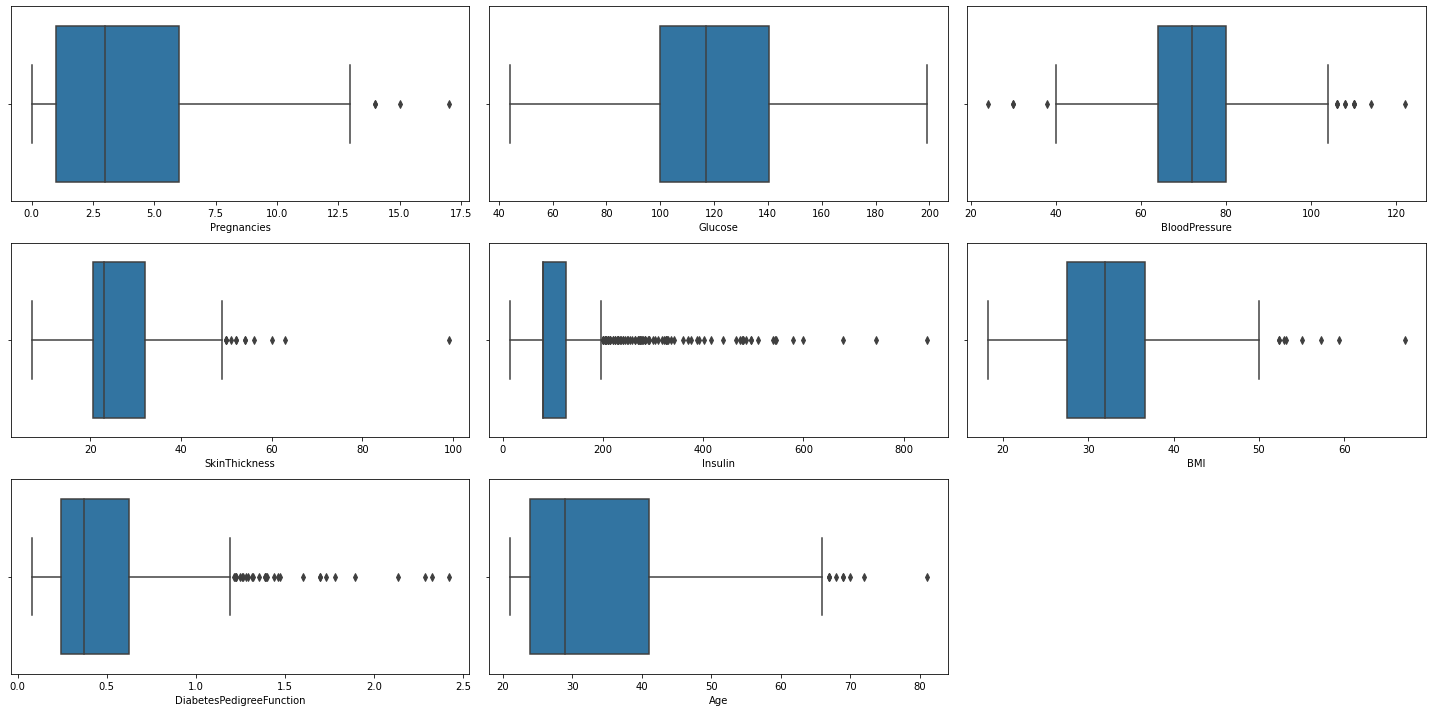

In [15]:
index = 0
plt.figure(figsize=(20, 10))
for feature in diabetes.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3, 3, index)
        sns.boxplot(diabetes[feature])

plt.tight_layout()
plt.show()

To remove some outliers:

In [16]:
diabetes = diabetes[(diabetes.SkinThickness < 70) & (diabetes.Glucose > 0) & (diabetes.BloodPressure > 35) & (diabetes.BMI > 0)]
diabetes.Outcome.value_counts()

0    498
1    266
Name: Outcome, dtype: int64

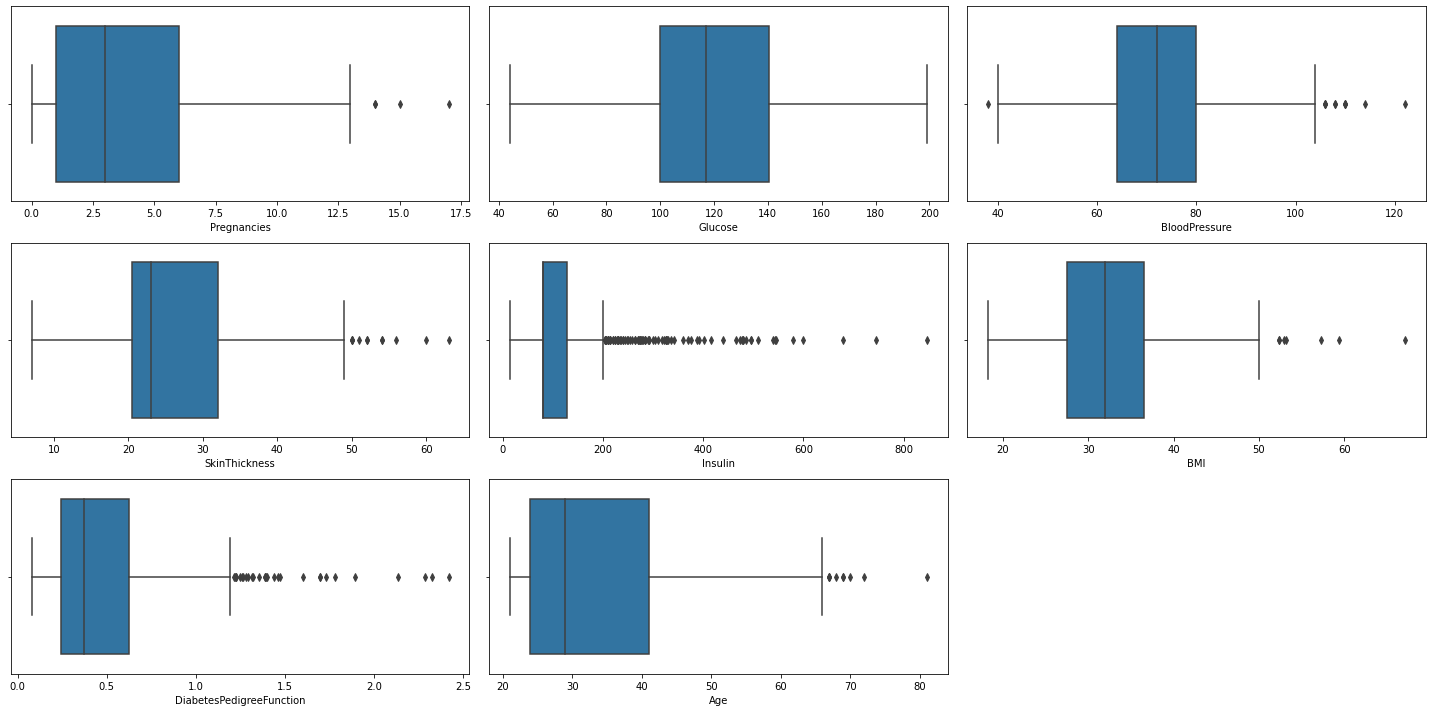

In [17]:
index = 0
plt.figure(figsize=(20, 10))
for feature in diabetes.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3, 3, index)
        sns.boxplot(diabetes[feature])

plt.tight_layout()
plt.show()

# Visualization

In [18]:
diabetes['Outcome'].value_counts()

0    498
1    266
Name: Outcome, dtype: int64

In [19]:
diabetes.groupby('Outcome')['Pregnancies'].value_counts()

Outcome  Pregnancies
0        1              104
         2               84
         0               73
         3               48
         4               45
         5               36
         6               34
         7               20
         8               16
         10              14
         9               10
         12               5
         13               5
         11               4
1        0               38
         1               28
         3               27
         7               25
         4               23
         8               22
         5               21
         2               18
         9               18
         6               16
         10              10
         11               7
         13               5
         12               4
         14               2
         15               1
         17               1
Name: Pregnancies, dtype: int64

In [20]:
diabetes['BloodPressure'].value_counts().sort_values(ascending=False).head(10)

70.000000    56
74.000000    52
78.000000    45
68.000000    45
72.000000    44
64.000000    43
80.000000    40
76.000000    39
60.000000    37
69.105469    35
Name: BloodPressure, dtype: int64

In [21]:
bp = pd.cut(diabetes['BloodPressure'],[38,76,122])
diabetes.pivot_table('Outcome',bp,aggfunc = 'count')

,Outcome
BloodPressure,
"(38, 76]",513
"(76, 122]",250


In [22]:
age = pd.cut(diabetes['Age'],[21,50,81])
diabetes.pivot_table('Outcome',age,aggfunc = 'count')

,Outcome
Age,
"(21, 50]",622
"(50, 81]",80


In [23]:
corr = diabetes.corr()
corr.style.background_gradient(cmap='Blues')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127596,0.202446,0.021910,-0.020203,0.026690,-0.033967,0.547781,0.223829
Glucose,0.127596,1.000000,0.213773,0.145397,0.398594,0.239013,0.136754,0.259105,0.493265
BloodPressure,0.202446,0.213773,1.000000,0.154983,0.002940,0.311013,-0.001877,0.329399,0.167400
SkinThickness,0.021910,0.145397,0.154983,1.000000,0.255088,0.549618,0.159987,0.002816,0.166437
Insulin,-0.020203,0.398594,0.002940,0.255088,1.000000,0.192772,0.158143,0.038663,0.179708
BMI,0.026690,0.239013,0.311013,0.549618,0.192772,1.000000,0.156605,0.026829,0.310463
DiabetesPedigreeFunction,-0.033967,0.136754,-0.001877,0.159987,0.158143,0.156605,1.000000,0.033143,0.173228
Age,0.547781,0.259105,0.329399,0.002816,0.038663,0.026829,0.033143,1.000000,0.235969
Outcome,0.223829,0.493265,0.167400,0.166437,0.179708,0.310463,0.173228,0.235969,1.000000


# Plots

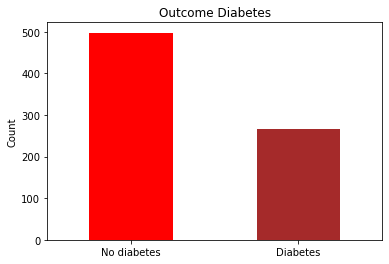

In [24]:
diabetes['Outcome'].value_counts().plot(kind = 'bar',color = ['red','brown'])
plt.xticks(np.arange(2),('No diabetes','Diabetes'),rotation = 0)
plt.title("Outcome Diabetes")
plt.ylabel('Count')
plt.show()

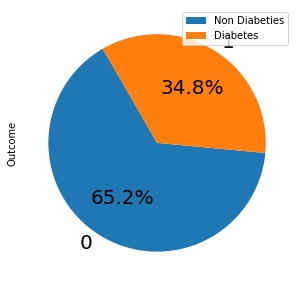

In [25]:
fig,ax = plt.subplots( figsize=(7,5) )
diabetes['Outcome'].value_counts(sort=False).plot(kind='pie',autopct='%1.1f%%', fontsize= 20,startangle=120)
plt.legend(['Non Diabeties','Diabetes'])
plt.show()

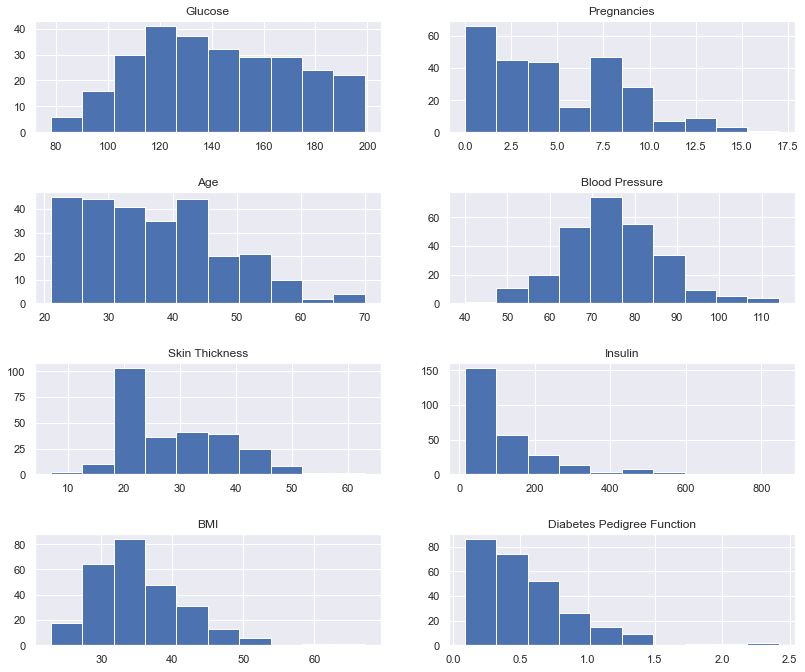

In [26]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(diabetes.Glucose[diabetes.Outcome==1]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(diabetes.Pregnancies[diabetes.Outcome==1]);
ax[1,0].set_title('Age')
ax[1,0].hist(diabetes.Age[diabetes.Outcome==1]);
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(diabetes.BloodPressure[diabetes.Outcome==1]);
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(diabetes.SkinThickness[diabetes.Outcome==1]);
ax[2,1].set_title('Insulin')
ax[2,1].hist(diabetes.Insulin[diabetes.Outcome==1]);
ax[3,0].set_title('BMI')
ax[3,0].hist(diabetes.BMI[diabetes.Outcome==1]);
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(diabetes.DiabetesPedigreeFunction[diabetes.Outcome==1]);

Comment: 
1) Maximum Glucose for diabetic person is 120.

2) High Blood pressure for diabetic person is between 70 to approximate 76.

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

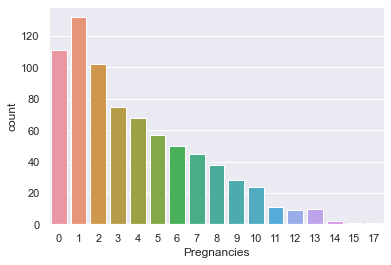

In [27]:
sns.countplot('Pregnancies',data=diabetes)

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

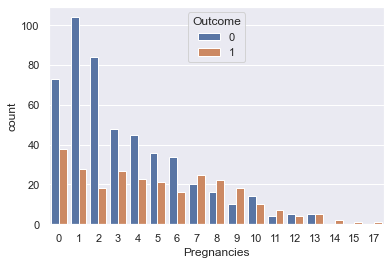

In [28]:
sns.countplot(x ='Pregnancies', hue = "Outcome", data = diabetes)

<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

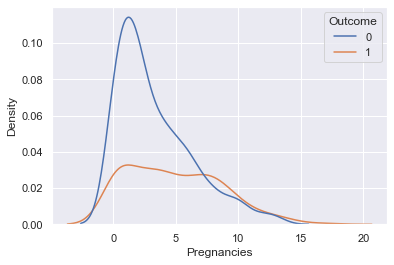

In [29]:
sns.kdeplot(x="Pregnancies", hue="Outcome", data=diabetes)

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

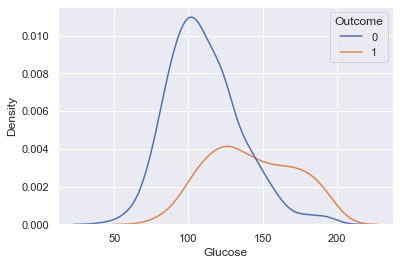

In [30]:
sns.kdeplot(x='Glucose',hue = 'Outcome',data=diabetes)

# Model Building

In [31]:

X = diabetes.iloc[:,:-1].values
y = diabetes['Outcome'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(611, 8)
(153, 8)
(611,)
(153,)


In [32]:

sd = StandardScaler()

x_train_sd = sd.fit_transform(X_train)
x_test_sd = sd.transform(X_test)


# KNeighbors

In [33]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_sd,y_train)
y_pred = knn.predict(x_test_sd)

In [34]:
knnacc = accuracy_score(y_test,y_pred)
knnacc

0.7254901960784313

<AxesSubplot:>

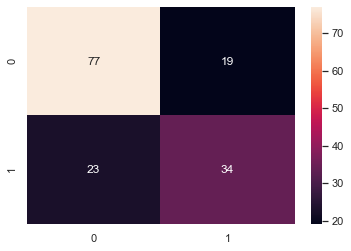

In [35]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [36]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        96
           1       0.64      0.60      0.62        57

    accuracy                           0.73       153
   macro avg       0.71      0.70      0.70       153
weighted avg       0.72      0.73      0.72       153



# Decision Tree

In [37]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train_sd,y_train)
y_pred = dt.predict(x_test_sd)


In [38]:
dtacc = accuracy_score(y_test,y_pred)
dtacc

0.673202614379085

<AxesSubplot:>

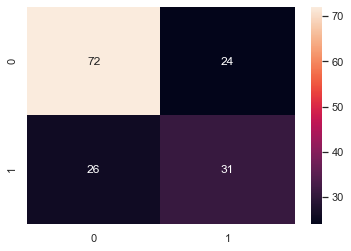

In [39]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [40]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.75      0.74        96
           1       0.56      0.54      0.55        57

    accuracy                           0.67       153
   macro avg       0.65      0.65      0.65       153
weighted avg       0.67      0.67      0.67       153



# SVC

In [41]:

svm = SVC(kernel='rbf')
svm.fit(x_train_sd,y_train)
y_pred = svm.predict(x_test_sd)

In [42]:
svmacc = accuracy_score(y_test,y_pred)
svmacc

0.7581699346405228

<AxesSubplot:>

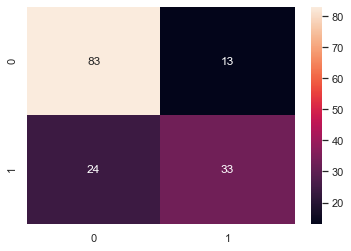

In [43]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [44]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        96
           1       0.72      0.58      0.64        57

    accuracy                           0.76       153
   macro avg       0.75      0.72      0.73       153
weighted avg       0.75      0.76      0.75       153



# Logistic Regression

In [45]:

lr = LogisticRegression()
lr.fit(x_train_sd,y_train)
y_pred = lr.predict(x_test_sd)

In [46]:
lracc = accuracy_score(y_test,y_pred)
lracc

0.7647058823529411

<AxesSubplot:>

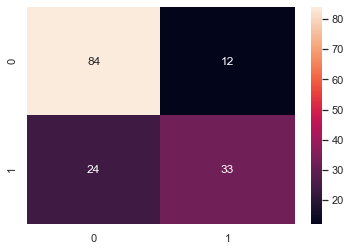

In [47]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [48]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        96
           1       0.73      0.58      0.65        57

    accuracy                           0.76       153
   macro avg       0.76      0.73      0.74       153
weighted avg       0.76      0.76      0.76       153



# GRadient boosting

In [49]:

gbc = GradientBoostingClassifier()
gbc.fit(x_train_sd,y_train)
y_pred = gbc.predict(x_test_sd)

In [50]:
gbcacc = accuracy_score(y_test,y_pred)
gbcacc

0.7254901960784313

<AxesSubplot:>

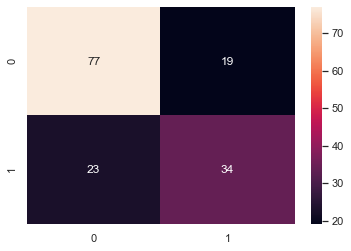

In [51]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [52]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        96
           1       0.64      0.60      0.62        57

    accuracy                           0.73       153
   macro avg       0.71      0.70      0.70       153
weighted avg       0.72      0.73      0.72       153



# XGBoost

In [53]:

xg = XGBClassifier()
xg.fit(x_train_sd,y_train)
y_pred = xg.predict(x_test_sd)

In [54]:
xgacc = accuracy_score(y_test,y_pred)
xgacc

0.738562091503268

<AxesSubplot:>

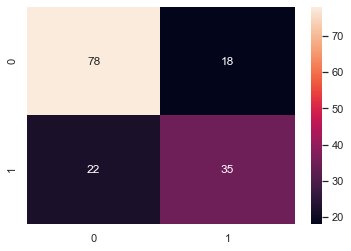

In [55]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [56]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80        96
           1       0.66      0.61      0.64        57

    accuracy                           0.74       153
   macro avg       0.72      0.71      0.72       153
weighted avg       0.74      0.74      0.74       153



In [57]:
df_compare = pd.DataFrame([[knnacc],[dtacc],[svmacc],[lracc],[gbcacc],[xgacc]],columns=['Accuracy'],index=['KNearest','DecisionTree','SVM','Logistic','GradientBoost','XGBoost'])
df_compare.sort_values(by = 'Accuracy',ascending=False)
df_compare = pd.DataFrame({'Model': ['KNearest','DecisionTree','SVM','Logistic','GradientBoost','XGBoost'],
                          'Accuracy': [knnacc,dtacc,svmacc,lracc,gbcacc,xgacc]})
df_compare.sort_values(by = 'Accuracy',ascending=False)

,Model,Accuracy
3,Logistic,0.764706
2,SVM,0.758170
5,XGBoost,0.738562
0,KNearest,0.725490
4,GradientBoost,0.725490
1,DecisionTree,0.673203


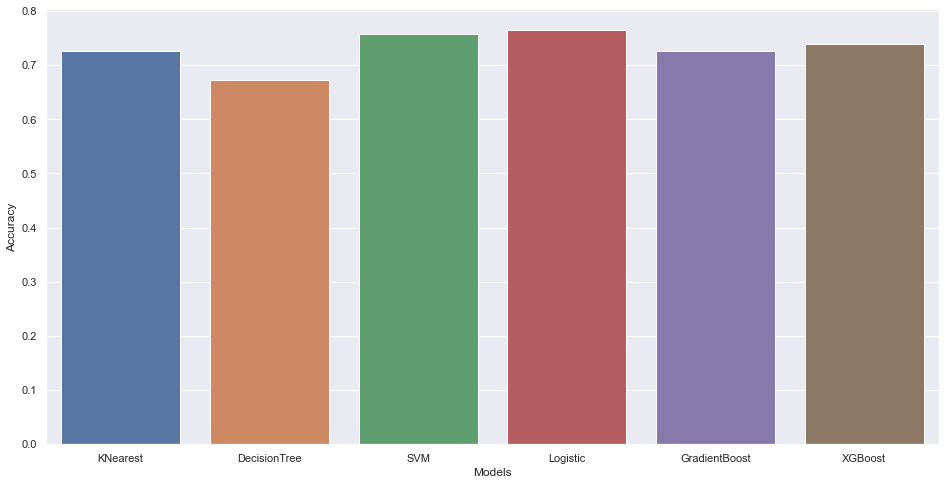

In [58]:
plt.figure(figsize=(16,8))
sns.barplot(x=df_compare['Model'],y=df_compare['Accuracy'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

Observations:

1) In dataset, diabetic patients are 268 and non-diabetic are 500.

2) Most of the females with diabetes have 0 pregnancies.

3) Outcome is modtly correlated with Glucose.

4) The logistic and SVM has highest accuracy as compared to others.

5) In logistic Regression, TP is 84 i.e Doctor perdicted correct value that patient has diabeties is 84.

   TN is 33 i.e Doctor predicted No and the patient is non-diabeties is 33.
   
   FP is 12 i.e Doctor predicted Yes but they dont have diabeties is 12.
   
   FN is 24 i.e Doctor Predicted No but they have diabeties is 24.
   
   Precision is above 0.7 i.e. Accuracy of positive prediction is pretty good.
   
   Recall is above 0.8 i.e. Fraction of positives that were correctly identified which is good.
   
6) In SVM, TP is 83 i.e Doctor perdicted correct value that patient has diabeties is 83.
   
   TN is 33 i.e Doctor predicted No and the patient is non-diabeties is 33.
   
   FP is 13 i.e Doctor predicted Yes but they dont have diabeties is 13.
   
   FN is 24 i.e Doctor Predicted No but they have diabeties is 24.
   
   Precision is above 0.7 i.e. Accuracy of positive prediction is pretty good.
   
   Recall is above 0.8 i.e. Fraction of positives that were correctly identified which is good.